# Proportion Plots

> A guide to plot proportion plot with binary data.

- order: 3

As of v2023.02.14, DABEST can be used to produce Cohen's *h* and the corresponding proportion plot for binary data. It's important to note that the code we provide only supports numerical proportion data, 
where the values are limited to 0 (failure) and 1 (success). This means that the code is not suitable for 
analyzing proportion data that contains non-numeric values, such as strings like 'yes' and 'no'.


## Load libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2023.02.14


## Create dataset for demo

In [ ]:
np.random.seed(9999) # Fix the seed so the results are replicable.
Ns = 40 # The number of samples taken from each population

# Create samples
n = 1
c1 = np.random.binomial(n, 0.2, size=Ns)
c2 = np.random.binomial(n, 0.2, size=Ns)
c3 = np.random.binomial(n, 0.8, size=Ns)

t1 = np.random.binomial(n, 0.5, size=Ns)
t2 = np.random.binomial(n, 0.2, size=Ns)
t3 = np.random.binomial(n, 0.3, size=Ns)
t4 = np.random.binomial(n, 0.4, size=Ns)
t5 = np.random.binomial(n, 0.5, size=Ns)
t6 = np.random.binomial(n, 0.6, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns / 2).tolist()
males = np.repeat('Male', Ns / 2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns + 1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1': c1, 'Test 1': t1,
                   'Control 2': c2, 'Test 2': t2,
                   'Control 3': c3, 'Test 3': t3,
                   'Test 4': t4, 'Test 5': t5, 'Test 6': t6,
                   'Gender': gender, 'ID': id_col
                   })
df.head()

,Control 1,Test 1,Control 2,Test 2,Control 3,Test 3,Test 4,Test 5,Test 6,Gender,ID
0,1,1,0,0,1,0,0,1,0,Female,1
1,0,0,0,1,1,1,0,0,0,Female,2
2,0,0,0,0,1,0,1,1,0,Female,3
3,0,0,0,0,1,0,0,1,0,Female,4
4,0,1,0,0,1,0,0,0,1,Female,5


## Loading Data

When loading data, specify ``proportional=True``.

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), proportional=True)

In [ ]:
two_groups_unpaired

DABEST v2023.02.14
                  
Good evening!
The current time is Sun Mar 19 22:41:40 2023.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

## Effect sizes

For proportion plot, dabest features two effect sizes:
  - the mean difference (``mean_diff``)
  - [Cohen's h](https://en.wikipedia.org/wiki/Cohen%27s_h) (``cohens_h``)

Each of these are attributes of the ``Dabest`` object.

In [ ]:
two_groups_unpaired.mean_diff

DABEST v2023.02.14
                  
Good evening!
The current time is Sun Mar 19 22:42:28 2023.

The unpaired mean difference between Control 1 and Test 1 is 0.375 [95%CI 0.15, 0.525].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis ofzero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

Let's compute the Cohen's h for our comparison.

In [ ]:
two_groups_unpaired.cohens_h

DABEST v2023.02.14
                  
Good evening!
The current time is Sun Mar 19 22:42:45 2023.

The unpaired Cohen's h between Control 1 and Test 1 is 0.825 [95%CI 0.33, 1.22].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis ofzero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.cohens_h.statistical_tests`

## Producing Proportional Plots

To produce a **Gardner-Altman estimation plot**, simply use the
``.plot()`` method. 

Every effect size instance has access to the ``.plot()`` method. This
means you can quickly create plots for different effect sizes easily.


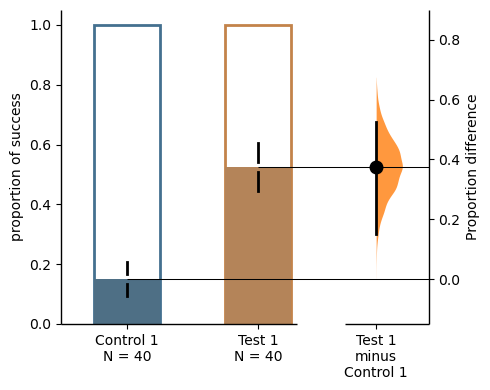

In [ ]:
two_groups_unpaired.mean_diff.plot();

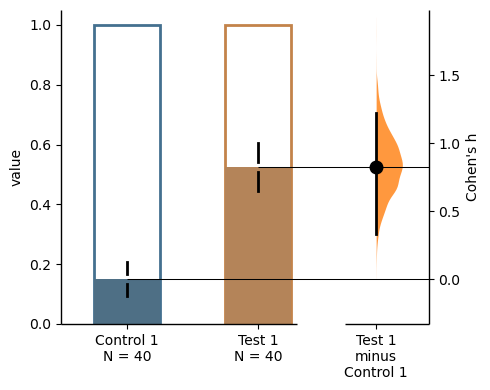

In [ ]:
two_groups_unpaired.cohens_h.plot();

The white part in the bar represents the proportion of observations in the dataset that do not belong to the category, which is 
equivalent to the proportion of 0 in the data. The colored part, on the other hand, represents the proportion of observations 
that belong to the category, which is equivalent to the proportion of 1 in the data. By default, the value of 'group_summaries' 
is set to "mean_sd". This means that the error bars in the plot display the mean and ± standard deviation of each group as 
gapped lines. The gap represents the mean, while the vertical ends represent the standard deviation. Alternatively, if the 
value of 'group_summaries' is set to "median_quartiles", the median and 25th and 75th percentiles of each group are plotted instead. 
By default, the bootstrap effect sizes is plotted on the right axis.

Instead of a Gardner-Altman plot, you can produce a **Cumming estimation
plot** by setting ``float_contrast=False`` in the ``plot()`` method.
This will plot the bootstrap effect sizes below the raw data.

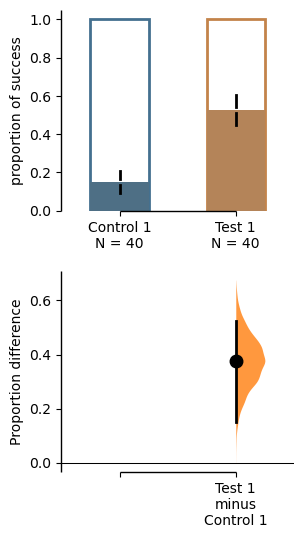

In [ ]:
two_groups_unpaired.mean_diff.plot(float_contrast=False);

You can also modify the width of bars as you expect by setting ``bar_width`` in the ``plot()`` method. 


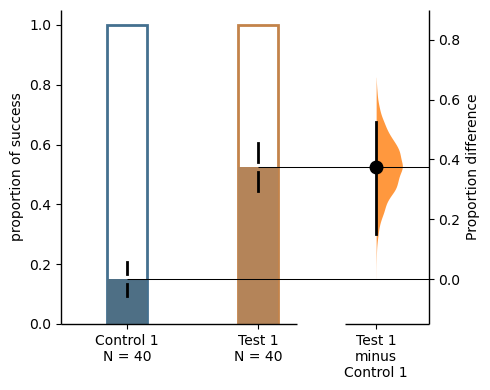

In [ ]:
two_groups_unpaired.mean_diff.plot(bar_width=0.3);

The ``bar_desat`` is used to control the amount of desaturation applied to the bar colors. A value of 0.0 means full desaturation (i.e., grayscale), 
while a value of 1.0 means no desaturation (i.e., full color saturation). Default is 0.8.


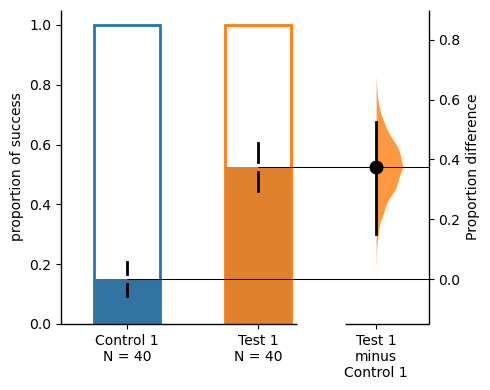

In [ ]:
two_groups_unpaired.mean_diff.plot(bar_desat=1.0);

``bar_label`` and ``contrast_label`` can be used to set labels for the y-axis of the bar plot and the contrast plot.


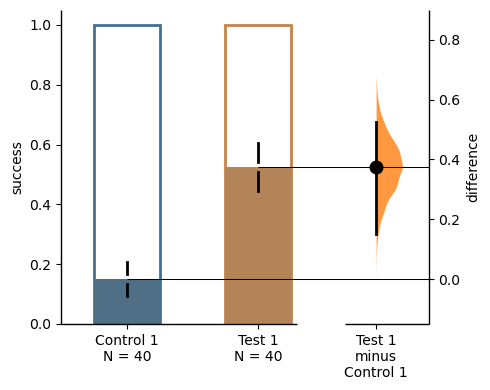

In [ ]:
two_groups_unpaired.mean_diff.plot(bar_label="success",contrast_label="difference");

The color of error bar can be modified by setting 'err_color'.


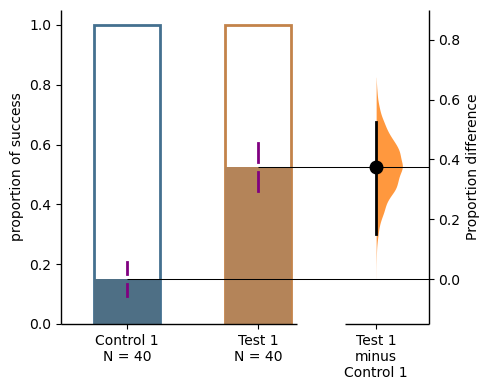

In [ ]:
two_groups_unpaired.mean_diff.plot(err_color="purple");

## Producing Paired Proportion Plots

In [ ]:
two_groups_unpaired.cohens_h.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney,proportional_difference
0,Control 1,Test 1,40,40,Cohen's h,None,0.825418,95,0.329684,1.219937,...,0.0,5000,"[0.011266025641025641, 0.011266025641025641, 0...",0.000289,-3.81474,0.000271,-3.81474,0.000434,500.0,0.825418


## Producing estimation plots

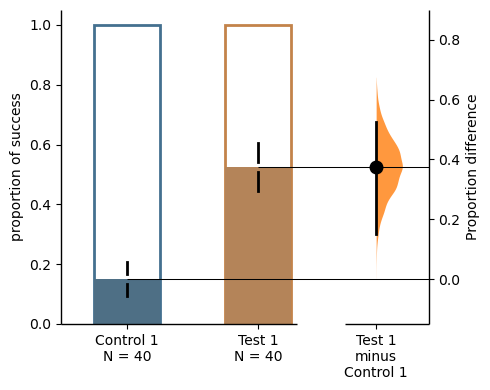

In [ ]:
two_groups_unpaired.mean_diff.plot();

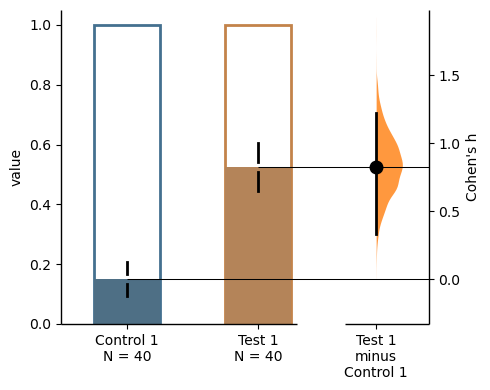

In [ ]:
two_groups_unpaired.cohens_h.plot();

The white part in the bar represents the proportion of observations in the dataset that do not belong to the category, which is 
equivalent to the proportion of 0 in the data. The colored part, on the other hand, represents the proportion of observations 
that belong to the category, which is equivalent to the proportion of 1 in the data. By default, the value of "group_summaries"
is set to "mean_sd". This means that the error bars in the plot display the mean and ± standard deviation of each group as 
gapped lines. The gap represents the mean, while the vertical ends represent the standard deviation. Alternatively, if the 
value of "group_summaries" is set to "median_quartiles", the median and 25th and 75th percentiles of each group are plotted instead. 
By default, the bootstrap effect sizes is plotted on the right axis.

Instead of a Gardner-Altman plot, you can produce a **Cumming estimation
plot** by setting ``float_contrast=False`` in the ``plot()`` method.
This will plot the bootstrap effect sizes below the raw data.

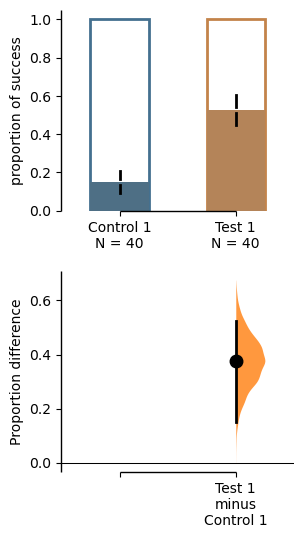

In [ ]:
two_groups_unpaired.mean_diff.plot(float_contrast=False);

## Producing Paired Proportion Plots

For paired version of proportional plot, we adapt the style of Sankey Diagram. The width of each bar in each xticks represent 
the proportion of corresponding label in the group, and the strip denotes the paired relationship for each observation.

Similar to the unpaired version, the ``.plot()`` method is used to produce a **Gardner-Altman estimation plot**, the only difference is that
the ``is_paired`` parameter is set to either ``baseline`` or  ``sequential`` when loading data.


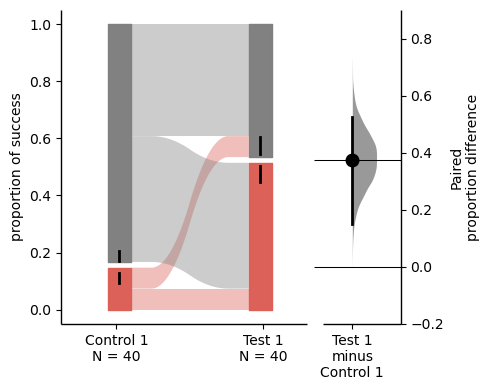

In [ ]:
two_groups_baseline = dabest.load(df, idx=("Control 1", "Test 1"), 
                                  proportional=True, paired="baseline", id_col="ID")
    
two_groups_baseline.mean_diff.plot();

The paired proportional plot also supports the ``float_contrast`` parameter, which can be set to ``False`` to produce a **Cumming estimation plot**.


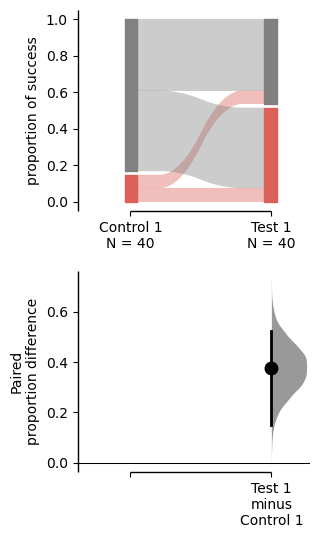

In [ ]:
two_groups_baseline.mean_diff.plot(float_contrast=False);

The upper part (grey part) of the bar represents the proportion of observations in the dataset that do not belong to the category, which is
equivalent to the proportion of 0 in the data. The lower part, on the other hand, represents the proportion of observations that belong to the category, which is
or **success**, which is equivalent to the proportion of 1 in the data. 


Repeated measures is also supported in paired proportional plot, by changing the ``is_paired`` parameter, two types of plot can be produced.



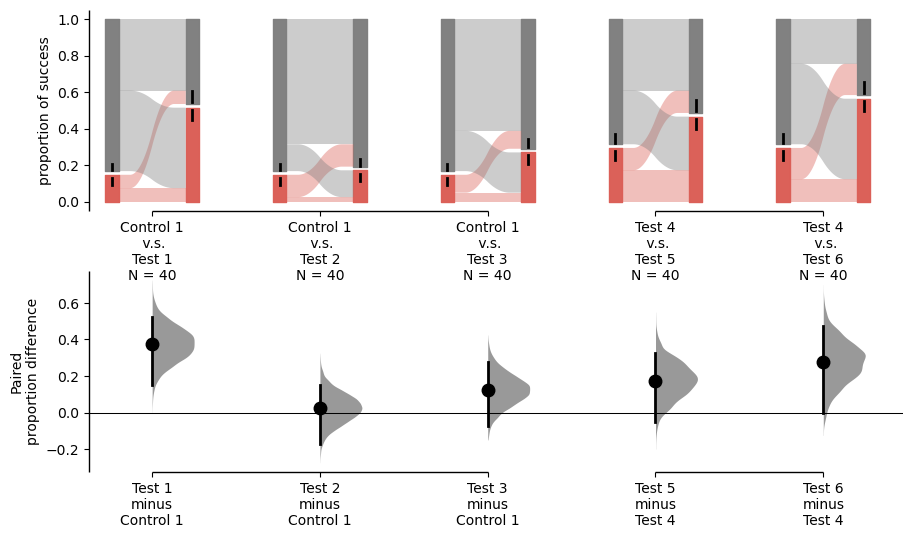

In [ ]:
multi_group_baseline = dabest.load(df, idx=((("Control 1", "Test 1","Test 2", "Test 3"),
                                ("Test 4", "Test 5", "Test 6"))),
                    proportional=True, paired="baseline", id_col="ID")

multi_group_baseline.mean_diff.plot();

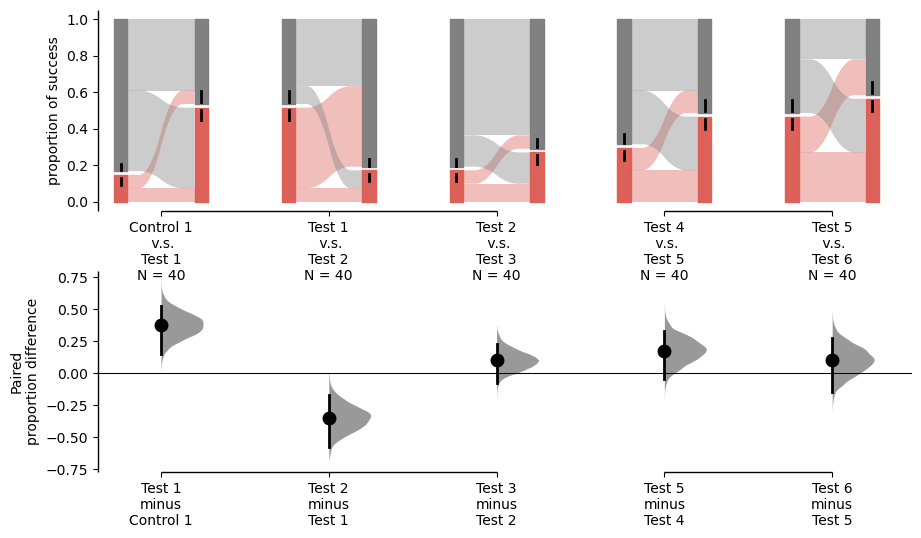

In [ ]:
multi_group_sequential = dabest.load(df, idx=((("Control 1", "Test 1","Test 2", "Test 3"),
                                ("Test 4", "Test 5", "Test 6"))),
                    proportional=True, paired="sequential", id_col="ID")

multi_group_sequential.mean_diff.plot();

From the above two images, we can see that the on both the observed value plot and delta plot, the pairs compared are different in terms of the paired settings. And for detailed information about repeated measures, please refer to :doc:`repeatedmeasures` .

If you want to specify the order of the groups, you can use the ``idx`` parameter in the ``.load()`` method.

For all the groups to be compared together, you can put all the groups in the ``idx`` parameter in the ``.load()`` method without subbrackets.


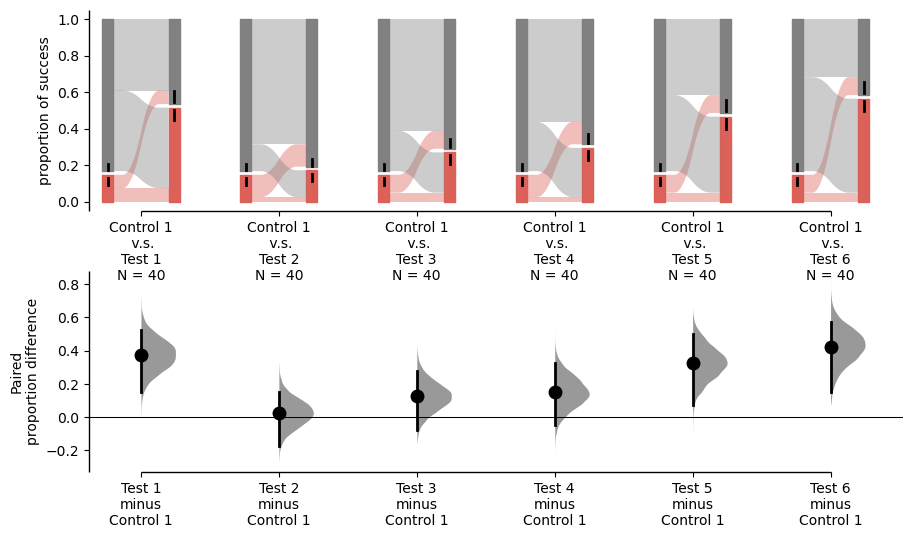

In [ ]:
multi_group_baseline_specify = dabest.load(df, idx=(("Control 1", "Test 1","Test 2", "Test 3",
                                "Test 4", "Test 5", "Test 6")),
                    proportional=True, paired="baseline", id_col="ID")

multi_group_baseline_specify.mean_diff.plot();

Several exclusive parameters can be supplied to the ``plot()`` method to customize the paired proportional plot.
By updating the sankey_kwargs parameter, you can customize the Sankey plot. The following parameters are supported:

- **width**: The width of each Sankey bar. Default is 0.5.
- **align**: The alignment of each Sankey bar. Default is "center".
- **alpha**: The transparency of each Sankey bar. Default is 0.4.
- **bar_width**: The width of each bar on the side in the plot. Default is 0.1.


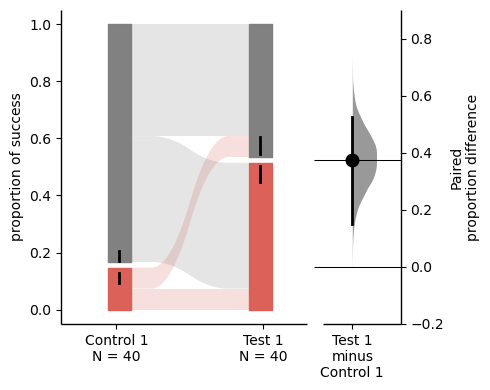

In [ ]:
two_groups_baseline.mean_diff.plot(sankey_kwargs = {"alpha": 0.2});